In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import sys
from matplotlib import collections as mc
from itertools import product
from scripts.spareme import *
from scripts.cleaner import logFile

plt.style.use('ggplot')
%matplotlib inline

### Cosine Similarity

In [3]:
sparky = create_sparsity_matrix('df_filtered.csv')

In [6]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

# create our pairwise distance matrix
pairwise = pd.DataFrame(
    squareform(pdist(sparky, metric='cosine')),
    columns = sparky.index,
    index = sparky.index
)

# move to long form
long_form = pairwise.unstack()

# rename columns and turn into a dataframe
long_form.index.rename(['accession', 'toDoc3'], inplace=True)
long_form = long_form.to_frame('cosine distance').reset_index()

### NMF

In [23]:
from scipy.sparse.linalg import svds
from sklearn.decomposition import NMF

In [24]:
model = NMF()

In [25]:
mat = model.fit_transform(sparky)

KeyboardInterrupt: 

In [ ]:
H = model.components_

In [ ]:
W = mat@H

In [ ]:
top5_NMF = W[0].argsort()[-6:][::-1][1:]

### Kernel Density Score

In [4]:
from sklearn.neighbors import KernelDensity

In [7]:
X = sparky
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
score_samples = kde.score_samples(X)

In [6]:
X = sparky
kde_cosine = KernelDensity(kernel='cosine', bandwidth=0.2).fit(X)
kde_cosine.score_samples(X)

array([nan, nan, nan, ..., nan, nan, nan])

Text(0.5, 1.0, 'Kernel Density - Gaussian')

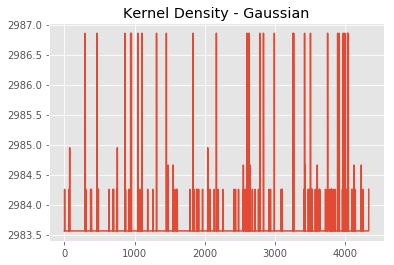

In [9]:
plt.plot(score_samples)
plt.title("Kernel Density - Gaussian")

In [10]:
kde_tophat = KernelDensity(kernel='tophat', bandwidth=0.2).fit(X)
tophat = kde_tophat.score_samples(X)

Text(0.5, 1.0, 'Kernel Density - Tophat')

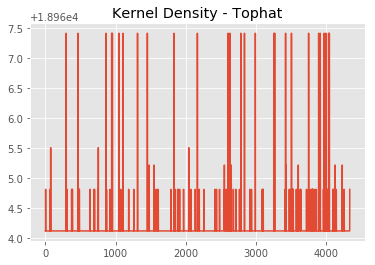

In [11]:
plt.plot(tophat)
plt.title("Kernel Density - Tophat")